In [1]:
# Importing packages that are necessary for the project
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the manipulated csv file as a pandas dataframe
df = pd.read_csv(r'Sign Stealing Data.csv')
df

,Sign,Sign Numbers,ae,aa,ad,af,ag,aj,ee,ea,...,gf,gg,gj,je,ja,jd,jf,jg,jj,Target
0,ddde,3334,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,afdea,15341,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,jajgjdj,2126232,0,0,0,0,0,1,0,0,...,0,0,1,0,1,1,0,1,0,1
3,eaffa,41551,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,dfjjfj,352252,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9790,jdgjj,23622,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
9791,ejdjegdjg,423246326,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
9792,aaef,1145,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9793,jgfafd,265153,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [3]:
# Checking if there are any null values
df.isnull().sum()

Sign            0
Sign Numbers    0
ae              0
aa              0
ad              0
af              0
ag              0
aj              0
ee              0
ea              0
ed              0
ef              0
eg              0
ej              0
de              0
da              0
dd              0
df              0
dg              0
dj              0
fe              0
fa              0
fd              0
ff              0
fg              0
fj              0
ge              0
ga              0
gd              0
gf              0
gg              0
gj              0
je              0
ja              0
jd              0
jf              0
jg              0
jj              0
Target          0
dtype: int64

In [4]:
# Assigning X as the columns with the possible pairs of the sequence letters
# Assigning y as the target/label column which is our class
X=df.iloc[:,2:38]
y=pd.DataFrame(df.iloc[:,-1])
y=df.iloc[:,-1]

C:\Users\kasha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of instances')

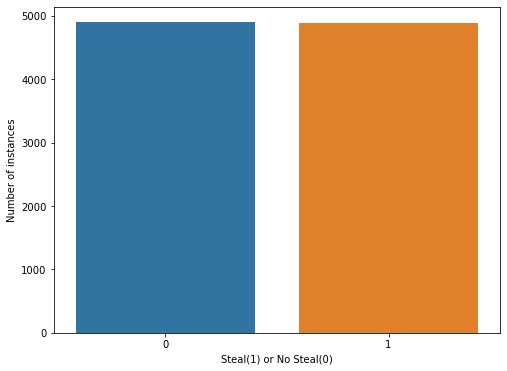

In [5]:
# Histogram to show that there are almost equal number of 1s (Steal) to the number of 0s(No Steal)
# This histogram shows that the synthetic data that we used was not biased
plt.figure(figsize=(8,6))
sns.countplot(df['Target'])
plt.xlabel("Steal(1) or No Steal(0)")
plt.ylabel("Number of instances")

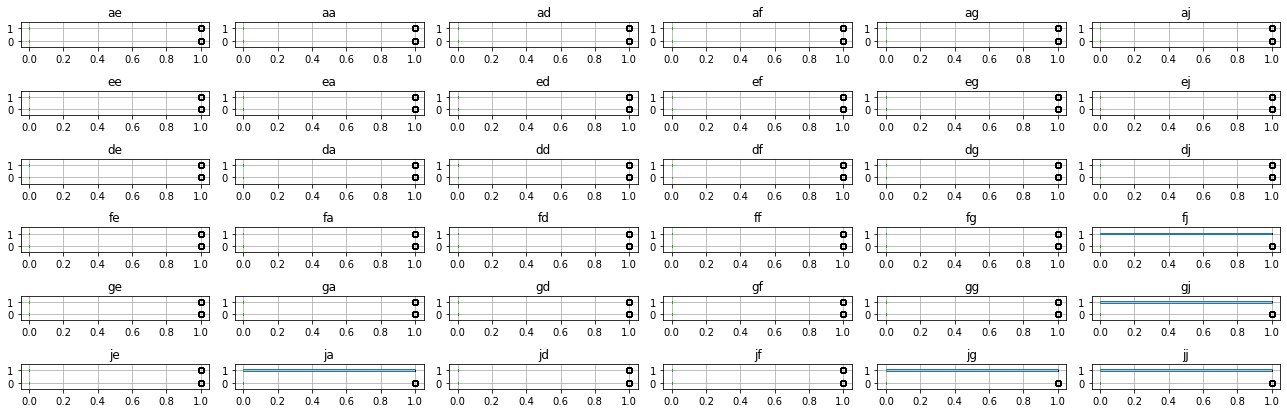

In [6]:
# This boxplot is used to look for feature importance
# We found out that the ones that consisted the letter j had more importance and is likely to be our key
df_features = df.drop(columns = ['Sign', 'Sign Numbers', 'Target'])
fig, axes = plt.subplots(6, 6, figsize=(18, 6))
for c, ax in zip (df_features.columns, axes.ravel()):
    df[[c, 'Target']].boxplot(vert=False, by="Target", ax=ax)
    ax.set_xlabel("")
plt.suptitle("")
plt.tight_layout()

In [7]:
# Scaling the data using Standard Scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [8]:
# Applying PCA on our data to see if PCA would lead to a good result
# In the end, we found PCA was not suitable for our data set
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
pca.fit(X)
X_pca = pca.transform(X)

In [9]:
# Spliting our data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
from sklearn.neural_network import MLPClassifier
mlp_reg = MLPClassifier(activation = 'relu', random_state=5, hidden_layer_sizes = [10,510], alpha = .2, max_iter = 1000)
mlp_reg.fit(X_train, y_train)
pred_mlp_reg = mlp_reg.predict(X_test)

In [11]:
mlp_scale = MLPClassifier(activation = 'relu', random_state=10, hidden_layer_sizes = [10,210], alpha = 2.5, max_iter = 1000)
mlp_scale.fit(X_train, y_train)
pred_mlp_scale = mlp_scale.predict(X_test)

In [12]:
mlp_pca = MLPClassifier(activation = 'relu', random_state=5, hidden_layer_sizes = [10,510], alpha = .5, max_iter = 1000)
mlp_pca.fit(X_train, y_train)
pred_mlp_pca = mlp_pca.predict(X_test)

In [13]:
# Confusion matrix for the regular non-scaled data
from sklearn.metrics import confusion_matrix
con_mlp_reg = confusion_matrix(y_test, pred_mlp_reg)
print("Confusion Matrix:\n{}".format(con_mlp_reg))

Confusion Matrix:
[[1007  258]
 [ 233  951]]


In [14]:
# Confusion matrix for the scaled data
con_mlp_scale = confusion_matrix(y_test, pred_mlp_scale)
print("Confusion Matrix:\n{}".format(con_mlp_scale))

Confusion Matrix:
[[1016  249]
 [ 225  959]]


In [15]:
# Confusion matrix for the data with PCA applied
con_mlp_pca = confusion_matrix(y_test, pred_mlp_pca)
print("Confusion Matrix:\n{}".format(con_mlp_pca))

Confusion Matrix:
[[1007  258]
 [ 249  935]]


In [16]:
TP = 1007
TN = 258
FP = 233
FN = 951
def calculate(TP,TN,FP,FN):
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    F = 2 * precision * recall/(precision+recall)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F:", F)
calculate(TP,TN,FP,FN)

Precision: 0.8120967741935484
Recall: 0.5143003064351379
F: 0.6297686053783614


In [17]:
TP = 1016
TN = 959
FP = 249
FN = 225

calculate(TP,TN,FP,FN)

Precision: 0.8031620553359684
Recall: 0.8186946011281225
F: 0.8108539505187551


In [18]:
TP = 1007
TN = 935
FP = 258
FN = 249

calculate(TP,TN,FP,FN)

Precision: 0.7960474308300395
Recall: 0.8017515923566879
F: 0.7988893296310987


In [19]:
# Accuracy was between 0.68 and 0.71 for training and between 0.68 and 0.72 for testing
# Best was random state = 5, train = 0.71, test = 0.72
# Scaling: Accuracy was 0.97 for training and was 0.84 or 0.85 for testing
# Best was random state = 10, train = 0.97, test = 0.85
for i in range(0,51,5):
    mlp = MLPClassifier(activation = 'relu', random_state=i, max_iter = 1000)
    mlp.fit(X_train, y_train)
    print("i:",i)
    print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
    print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

i: 0
Accuracy on training set: 0.97
Accuracy on test set: 0.84
i: 5
Accuracy on training set: 0.97
Accuracy on test set: 0.84
i: 10
Accuracy on training set: 0.97
Accuracy on test set: 0.84
i: 15
Accuracy on training set: 0.97
Accuracy on test set: 0.83
i: 20
Accuracy on training set: 0.97
Accuracy on test set: 0.84
i: 25
Accuracy on training set: 0.97
Accuracy on test set: 0.84
i: 30
Accuracy on training set: 0.97
Accuracy on test set: 0.85
i: 35
Accuracy on training set: 0.97
Accuracy on test set: 0.83
i: 40
Accuracy on training set: 0.97
Accuracy on test set: 0.85
i: 45
Accuracy on training set: 0.97
Accuracy on test set: 0.84
i: 50
Accuracy on training set: 0.97
Accuracy on test set: 0.84


In [20]:
# Accuracy was between 0.49 and 0.73 for training and between 0.52 and 0.72 for testing
# Best was hidden layer sizes = 510, train = 0.73, test = 0.72
# Scaling: Accuracy was between 0.85 and 0.96 for training and between 0.77 and 0.80 for testing
# Best was hidden layer sizes = 210, train = 0.91, test = 0.80

for i in range(10,210,20):
    mlp = MLPClassifier(activation = 'relu', random_state=25, hidden_layer_sizes = [10,i], max_iter = 1000)
    mlp.fit(X_train, y_train)
    print("i:",i)
    print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
    print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

i: 10
Accuracy on training set: 0.86
Accuracy on test set: 0.81
i: 30
Accuracy on training set: 0.86
Accuracy on test set: 0.81
i: 50
Accuracy on training set: 0.87
Accuracy on test set: 0.79
i: 70
Accuracy on training set: 0.87
Accuracy on test set: 0.80
i: 90
Accuracy on training set: 0.89
Accuracy on test set: 0.81
i: 110
Accuracy on training set: 0.88
Accuracy on test set: 0.81
i: 130
Accuracy on training set: 0.90
Accuracy on test set: 0.80
i: 150
Accuracy on training set: 0.88
Accuracy on test set: 0.81
i: 170
Accuracy on training set: 0.91
Accuracy on test set: 0.79
i: 190
Accuracy on training set: 0.91
Accuracy on test set: 0.80


In [21]:
# Accuracy was between 0.49 and 0.73 for training and between 0.52 and 0.72 for testing
# Best was alpha = 0.20, train = 0.73, test = 0.72
# Scaling: Accuracy was between 0.71 and 0.86 for training and between 0.70 and 0.84 for testing
# Best was alpha = 2.50, train = 0.85, test = 0.84

for i in range(1,21):
    mlp = MLPClassifier(activation = 'relu', random_state=10, hidden_layer_sizes = [10,50], alpha = i*.5, max_iter = 1000)
    mlp.fit(X_train, y_train)
    print("i: {:.2f}".format(i*.5))
    print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
    print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

i: 0.50
Accuracy on training set: 0.87
Accuracy on test set: 0.85
i: 1.00
Accuracy on training set: 0.86
Accuracy on test set: 0.83
i: 1.50
Accuracy on training set: 0.86
Accuracy on test set: 0.82
i: 2.00
Accuracy on training set: 0.86
Accuracy on test set: 0.83
i: 2.50
Accuracy on training set: 0.85
Accuracy on test set: 0.82
i: 3.00
Accuracy on training set: 0.85
Accuracy on test set: 0.82
i: 3.50
Accuracy on training set: 0.85
Accuracy on test set: 0.82
i: 4.00
Accuracy on training set: 0.84
Accuracy on test set: 0.81
i: 4.50
Accuracy on training set: 0.84
Accuracy on test set: 0.81
i: 5.00
Accuracy on training set: 0.82
Accuracy on test set: 0.78
i: 5.50
Accuracy on training set: 0.81
Accuracy on test set: 0.79
i: 6.00
Accuracy on training set: 0.80
Accuracy on test set: 0.77
i: 6.50
Accuracy on training set: 0.78
Accuracy on test set: 0.77
i: 7.00
Accuracy on training set: 0.77
Accuracy on test set: 0.76
i: 7.50
Accuracy on training set: 0.72
Accuracy on test set: 0.71
i: 8.00
Ac

In [22]:
#This is the best overall accuracy that we found
X=df.iloc[:,2:38]
y=pd.DataFrame(df.iloc[:,-1])
y=df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


mlp = MLPClassifier(activation = "tanh", random_state=0, hidden_layer_sizes=[10, 10], max_iter=800, alpha=0.1)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))



Accuracy on training set: 0.87
Accuracy on test set: 0.85


In [23]:
# Predictions from the model with the best result
y_pred = mlp.predict(X_test)

In [24]:
finalModelConfusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n{}".format(finalModelConfusion))

Confusion Matrix:
[[1083  182]
 [ 183 1001]]


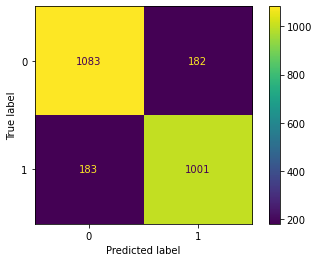

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp, X_test, y_test)  
plt.show()

In [25]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8457963667089142

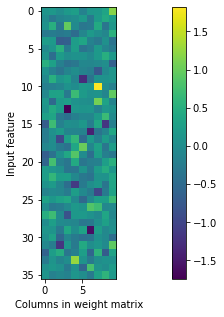

In [26]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

# looks like all the features we used have somewhat similar weights which
# lets us know that each feature is each important to the model

C:\Users\kasha\AppData\Local\Temp/ipykernel_10756/706772433.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat, dtype=np.bool)


<AxesSubplot:>

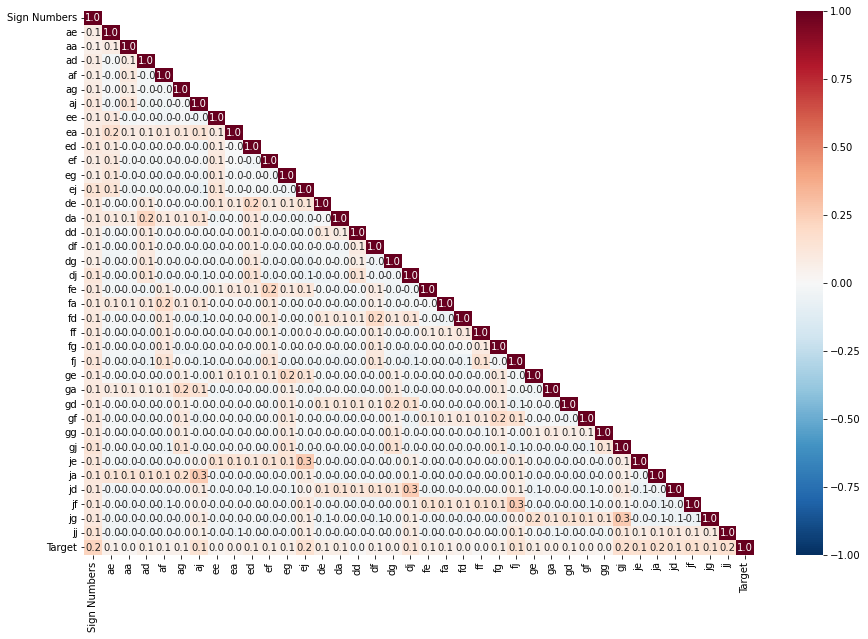

In [27]:
# Create correlation matrix
corr_mat = df.corr()

# Create mask
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, fmt='.1f',
            cmap='RdBu_r', vmin=-1, vmax=1,
            mask=mask)

In [28]:
df.keys()

Index(['Sign', 'Sign Numbers', 'ae', 'aa', 'ad', 'af', 'ag', 'aj', 'ee', 'ea',
       'ed', 'ef', 'eg', 'ej', 'de', 'da', 'dd', 'df', 'dg', 'dj', 'fe', 'fa',
       'fd', 'ff', 'fg', 'fj', 'ge', 'ga', 'gd', 'gf', 'gg', 'gj', 'je', 'ja',
       'jd', 'jf', 'jg', 'jj', 'Target'],
      dtype='object')

In [29]:
#exporting the model which can be used to create a web app
import pickle
pickle.dump(mlp, open('model.pkl', 'wb'))